In [133]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Set random seed
random_state = 42

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble  import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score,classification_report

## Import dataset

In [135]:
data = 'data/healthcare-dataset-stroke-data.csv'

In [136]:
df = pd.read_csv(data)

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [137]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly_smoked,1
1,51676,female,61.0,0,0,yes,self-employed,rural,202.21,NaN,never_smoked,1
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.5,never_smoked,1
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1
4,1665,female,79.0,1,0,yes,self-employed,rural,174.12,24.0,never_smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,female,80.0,1,0,yes,private,urban,83.75,NaN,never_smoked,0
5106,44873,female,81.0,0,0,yes,self-employed,urban,125.20,40.0,never_smoked,0
5107,19723,female,35.0,0,0,yes,self-employed,rural,82.99,30.6,never_smoked,0
5108,37544,male,51.0,0,0,yes,private,rural,166.29,25.6,formerly_smoked,0


In [138]:
df = df.drop('id', axis=1)

## Missing values

In [139]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [140]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [141]:
ratio_null = df.bmi.isnull().sum() / len(df)
ratio_null

np.float64(0.03933463796477495)

In [142]:
median=df['bmi'].median()
df.bmi = df.bmi.fillna(median)

In [143]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly_smoked,1
1,female,61.0,0,0,yes,self-employed,rural,202.21,28.1,never_smoked,1
2,male,80.0,0,1,yes,private,rural,105.92,32.5,never_smoked,1
3,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1
4,female,79.0,1,0,yes,self-employed,rural,174.12,24.0,never_smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,female,80.0,1,0,yes,private,urban,83.75,28.1,never_smoked,0
5106,female,81.0,0,0,yes,self-employed,urban,125.20,40.0,never_smoked,0
5107,female,35.0,0,0,yes,self-employed,rural,82.99,30.6,never_smoked,0
5108,male,51.0,0,0,yes,private,rural,166.29,25.6,formerly_smoked,0


In [144]:
len(df)

5110

## Explore numerical values

<Axes: xlabel='age', ylabel='Count'>

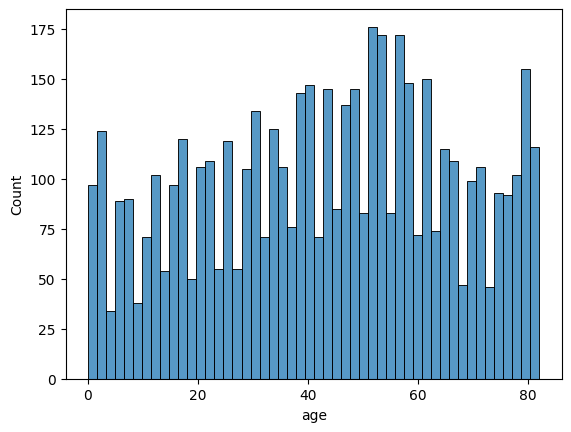

In [145]:
sns.histplot(df.age, bins=50)

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

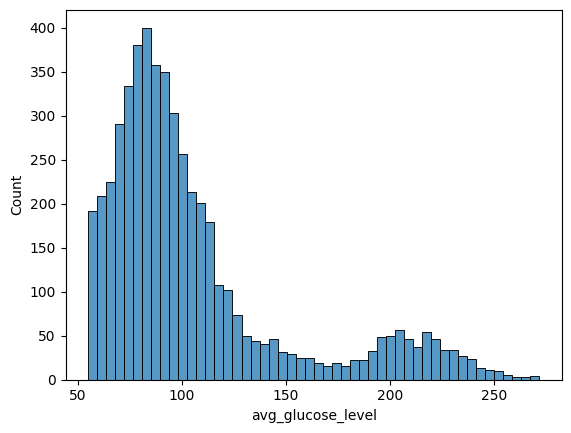

In [146]:
sns.histplot(df.avg_glucose_level, bins=50)

<Axes: xlabel='bmi', ylabel='Count'>

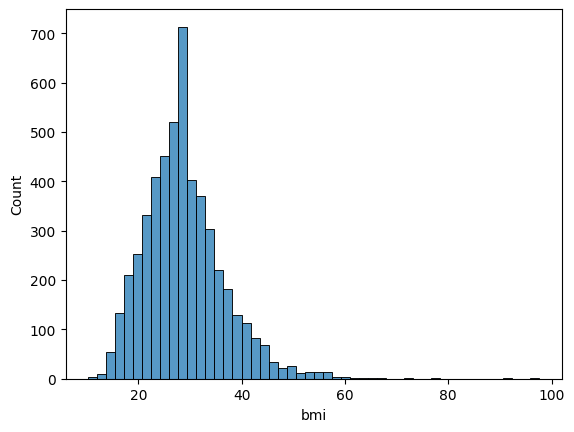

In [147]:
sns.histplot(df.bmi, bins=50)

## Resample to manage class imbalance

In [148]:
df.stroke.value_counts(normalize=True) #big class imbalance

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

In [149]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [150]:
numerical = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [151]:
categorical = ['gender',
              'ever_married',
              'work_type',
              'residence_type',
              'smoking_status']

In [152]:
df[categorical].nunique()

gender            3
ever_married      2
work_type         5
residence_type    2
smoking_status    4
dtype: int64

In [153]:
len(df)

5110

In [154]:
from sklearn.utils import resample

# Separate the dataset into two groups: stroke = 1 and stroke = 0
df_stroke_1 = df[df['stroke'] == 1]
df_stroke_0 = df[df['stroke'] == 0]

In [155]:
# Set the size of the groups based on the desired ratio
n_stroke_1 = len(df_stroke_1)
n_stroke_0 = 1250  # Desired size for approx. 16% of stroke = 1 in the new dataset

In [156]:
# Downsample the stroke = 0 group to balance the dataset
df_stroke_0_resampled = resample(
    df_stroke_0,
    replace=False,  # Without replacement
    n_samples=n_stroke_0,
    random_state=42  # For reproducibility
)

In [157]:
# Combine the two subsets to create the new balanced dataset
df_resampled = pd.concat([df_stroke_1, df_stroke_0_resampled])

In [158]:
# Reset the index to avoid conflicts
df_resampled = df_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [159]:
# Check the proportions
print("Proportions after resampling:")
print(df_resampled['stroke'].value_counts(normalize=True))

Proportions after resampling:
stroke
0    0.833889
1    0.166111
Name: proportion, dtype: float64


## Split the dataset

In [160]:
df_full_train, df_test = train_test_split(df_resampled, test_size=0.2, random_state=random_state)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=random_state)

In [161]:
len(df_train), len(df_val), len(df_test)

(899, 300, 300)

In [162]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [163]:
y_train = df_train.stroke.values
y_val = df_val.stroke.values
y_test = df_test.stroke.values

del df_train['stroke']
del df_val['stroke']
del df_test['stroke']

In [164]:
df_full_train[numerical].corrwith(df_full_train.stroke)

age                  0.432459
hypertension         0.191856
heart_disease        0.215575
avg_glucose_level    0.219267
bmi                  0.071166
dtype: float64

In [165]:
from sklearn.metrics import mutual_info_score

In [177]:
df_full_train[categorical].apply(lambda x: mutual_info_score(x, df_full_train.stroke))

gender            0.001148
ever_married      0.015946
work_type         0.025167
residence_type    0.000204
smoking_status    0.006992
dtype: float64

In [170]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.stroke)

In [171]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

work_type         0.025167
ever_married      0.015946
smoking_status    0.006992
gender            0.001148
residence_type    0.000204
dtype: float64

## One-hot encoding

In [172]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [176]:
model = LogisticRegression(solver='liblinear')

model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = model.predict_proba(X_val)[:, 1]